In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [17]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [18]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [19]:
X_val, y_val = X_train[50000:], y_train[50000:]
X_train, y_train = X_train[:50000], y_train[:50000]

In [20]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

c:\Users\vaibh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",save_best_only=True,mode="min",verbose=1)

In [23]:
es = EarlyStopping(monitor="val_loss",
                   patience=5,restore_best_weights=True)

In [24]:
lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                 factor=0.5,patience=2,verbose=1)

In [25]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50,batch_size=64,verbose=1,callbacks=[checkpoint,es,lr_scheduler])

Epoch 1/50


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7626 - loss: 1.1820
Epoch 1: val_loss improved from None to 0.44041, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8609 - loss: 0.8230 - val_accuracy: 0.9587 - val_loss: 0.4404 - learning_rate: 0.0010
Epoch 2/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9280 - loss: 0.5208
Epoch 2: val_loss improved from 0.44041 to 0.35724, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9307 - loss: 0.4938 - val_accuracy: 0.9603 - val_loss: 0.3572 - learning_rate: 0.0010
Epoch 3/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9410 - loss: 0.4181
Epoch 3: val_loss improved from 0.35724 to 0.29918, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9419 - loss: 0.4060 - val_accuracy: 0.9662 - val_loss: 0.2992 - learning_rate: 0.0010
Epoch 4/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9454 - loss: 0.3690
Epoch 4: val_loss improved from 0.29918 to 0.26884, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9450 - loss: 0.3669 - val_accuracy: 0.9689 - val_loss: 0.2688 - learning_rate: 0.0010
Epoch 5/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9493 - loss: 0.3341
Epoch 5: val_loss improved from 0.26884 to 0.25238, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9482 - loss: 0.3346 - val_accuracy: 0.9706 - val_loss: 0.2524 - learning_rate: 0.0010
Epoch 6/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9505 - loss: 0.3188
Epoch 6: val_loss improved from 0.25238 to 0.24425, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9511 - loss: 0.3195 - val_accuracy: 0.9712 - val_loss: 0.2442 - learning_rate: 0.0010
Epoch 7/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9492 - loss: 0.3217
Epoch 7: val_loss improved from 0.24425 to 0.23509, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9512 - loss: 0.3137 - val_accuracy: 0.9724 - val_loss: 0.2351 - learning_rate: 0.0010
Epoch 8/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9523 - loss: 0.3044
Epoch 8: val_loss improved from 0.23509 to 0.23232, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9516 - loss: 0.3054 - val_accuracy: 0.9725 - val_loss: 0.2323 - learning_rate: 0.0010
Epoch 9/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9529 - loss: 0.2947
Epoch 9: val_loss did not improve from 0.23232
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9513 - loss: 0.2996 - val_accuracy: 0.9652 - val_loss: 0.2538 - learning_rate: 0.0010
Epoch 10/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9515 - loss: 0.3008
Epoch 10: val_loss did not improve from 0.23232

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9512 - loss: 0.2992 - val_accuracy: 0.9655 - val_loss: 0.2507 - learning_rate: 0.0010
Epoch 11/50
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9618 - loss: 0.2615
Epoch 11: val_loss improved from 0.23232 to 0.19204, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9634 - loss: 0.2494 - val_accuracy: 0.9771 - val_loss: 0.1920 - learning_rate: 5.0000e-04
Epoch 12/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9662 - loss: 0.2237
Epoch 12: val_loss improved from 0.19204 to 0.17853, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9661 - loss: 0.2239 - val_accuracy: 0.9779 - val_loss: 0.1785 - learning_rate: 5.0000e-04
Epoch 13/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9669 - loss: 0.2123
Epoch 13: val_loss improved from 0.17853 to 0.17127, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9656 - loss: 0.2169 - val_accuracy: 0.9780 - val_loss: 0.1713 - learning_rate: 5.0000e-04
Epoch 14/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9684 - loss: 0.2031
Epoch 14: val_loss did not improve from 0.17127
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9672 - loss: 0.2056 - val_accuracy: 0.9755 - val_loss: 0.1735 - learning_rate: 5.0000e-04
Epoch 15/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9666 - loss: 0.1998
Epoch 15: val_loss improved from 0.17127 to 0.16254, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9671 - loss: 0.2017 - val_accuracy: 0.9792 - val_loss: 0.1625 - learning_rate: 5.0000e-04
Epoch 16/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9670 - loss: 0.1997
Epoch 16: val_loss improved from 0.16254 to 0.16061, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9673 - loss: 0.1995 - val_accuracy: 0.9791 - val_loss: 0.1606 - learning_rate: 5.0000e-04
Epoch 17/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9656 - loss: 0.2028
Epoch 17: val_loss improved from 0.16061 to 0.15938, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9675 - loss: 0.1952 - val_accuracy: 0.9789 - val_loss: 0.1594 - learning_rate: 5.0000e-04
Epoch 18/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9672 - loss: 0.1936
Epoch 18: val_loss did not improve from 0.15938
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9670 - loss: 0.1954 - val_accuracy: 0.9791 - val_loss: 0.1608 - learning_rate: 5.0000e-04
Epoch 19/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9687 - loss: 0.1903
Epoch 19: val_loss did not improve from 0.15938

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9677 - loss: 0.1936 - val_accuracy: 0.9777 - val_loss: 0.1681 - learning_rate: 5.0000e-04
Epoch 20/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9710 - loss: 0.1793
Epoch 20: val_loss improved from 0.15938 to 0.14904, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9729 - loss: 0.1735 - val_accuracy: 0.9798 - val_loss: 0.1490 - learning_rate: 2.5000e-04
Epoch 21/50
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9758 - loss: 0.1549
Epoch 21: val_loss improved from 0.14904 to 0.13919, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9759 - loss: 0.1542 - val_accuracy: 0.9823 - val_loss: 0.1392 - learning_rate: 2.5000e-04
Epoch 22/50
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9765 - loss: 0.1476
Epoch 22: val_loss improved from 0.13919 to 0.13633, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9763 - loss: 0.1472 - val_accuracy: 0.9826 - val_loss: 0.1363 - learning_rate: 2.5000e-04
Epoch 23/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9789 - loss: 0.1359
Epoch 23: val_loss improved from 0.13633 to 0.12818, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9777 - loss: 0.1414 - val_accuracy: 0.9819 - val_loss: 0.1282 - learning_rate: 2.5000e-04
Epoch 24/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9782 - loss: 0.1395
Epoch 24: val_loss did not improve from 0.12818
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9785 - loss: 0.1374 - val_accuracy: 0.9819 - val_loss: 0.1293 - learning_rate: 2.5000e-04
Epoch 25/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9771 - loss: 0.1370
Epoch 25: val_loss did not improve from 0.12818

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9774 - loss: 0.1372 - val_accuracy: 0.9820 - val_loss: 0.1289 - learning_rate: 2.5000e-04
Epoch 26/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9828 - loss: 0.1204
Epoch 26: val_loss improved from 0.12818 to 0.11974, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9820 - loss: 0.1216 - val_accuracy: 0.9835 - val_loss: 0.1197 - learning_rate: 1.2500e-04
Epoch 27/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9833 - loss: 0.1142
Epoch 27: val_loss improved from 0.11974 to 0.11881, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9830 - loss: 0.1142 - val_accuracy: 0.9841 - val_loss: 0.1188 - learning_rate: 1.2500e-04
Epoch 28/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9833 - loss: 0.1094
Epoch 28: val_loss improved from 0.11881 to 0.11760, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9835 - loss: 0.1085 - val_accuracy: 0.9833 - val_loss: 0.1176 - learning_rate: 1.2500e-04
Epoch 29/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9841 - loss: 0.1049
Epoch 29: val_loss improved from 0.11760 to 0.11638, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9836 - loss: 0.1066 - val_accuracy: 0.9848 - val_loss: 0.1164 - learning_rate: 1.2500e-04
Epoch 30/50
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9855 - loss: 0.1008
Epoch 30: val_loss improved from 0.11638 to 0.11325, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9839 - loss: 0.1054 - val_accuracy: 0.9838 - val_loss: 0.1132 - learning_rate: 1.2500e-04
Epoch 31/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.0989
Epoch 31: val_loss improved from 0.11325 to 0.11298, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9841 - loss: 0.1025 - val_accuracy: 0.9832 - val_loss: 0.1130 - learning_rate: 1.2500e-04
Epoch 32/50
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9860 - loss: 0.0966
Epoch 32: val_loss did not improve from 0.11298
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9861 - loss: 0.0956 - val_accuracy: 0.9838 - val_loss: 0.1138 - learning_rate: 1.2500e-04
Epoch 33/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9850 - loss: 0.0968
Epoch 33: val_loss improved from 0.11298 to 0.10807, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9852 - loss: 0.0962 - val_accuracy: 0.9844 - val_loss: 0.1081 - learning_rate: 1.2500e-04
Epoch 34/50
768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9854 - loss: 0.0918
Epoch 34: val_loss did not improve from 0.10807
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9853 - loss: 0.0930 - val_accuracy: 0.9833 - val_loss: 0.1093 - learning_rate: 1.2500e-04
Epoch 35/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9854 - loss: 0.0935
Epoch 35: val_loss did not improve from 0.10807

Epoch 35: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9856 - loss: 0.0928 - val_accuracy: 0.9840 - val_loss: 0.1109 - learning_rate: 1.2500e-04
Epoch 36/50
769/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9867 - loss: 0.0899
Epoch 36: val_loss improved from 0.10807 to 0.10613, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9873 - loss: 0.0865 - val_accuracy: 0.9841 - val_loss: 0.1061 - learning_rate: 6.2500e-05
Epoch 37/50
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9882 - loss: 0.0831
Epoch 37: val_loss improved from 0.10613 to 0.10551, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9880 - loss: 0.0839 - val_accuracy: 0.9843 - val_loss: 0.1055 - learning_rate: 6.2500e-05
Epoch 38/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9890 - loss: 0.0795
Epoch 38: val_loss improved from 0.10551 to 0.10399, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9884 - loss: 0.0814 - val_accuracy: 0.9853 - val_loss: 0.1040 - learning_rate: 6.2500e-05
Epoch 39/50
768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9904 - loss: 0.0757
Epoch 39: val_loss did not improve from 0.10399
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9895 - loss: 0.0768 - val_accuracy: 0.9841 - val_loss: 0.1049 - learning_rate: 6.2500e-05
Epoch 40/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9890 - loss: 0.0769
Epoch 40: val_loss improved from 0.10399 to 0.10283, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9886 - loss: 0.0784 - val_accuracy: 0.9848 - val_loss: 0.1028 - learning_rate: 6.2500e-05
Epoch 41/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.0744
Epoch 41: val_loss did not improve from 0.10283
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9896 - loss: 0.0756 - val_accuracy: 0.9843 - val_loss: 0.1049 - learning_rate: 6.2500e-05
Epoch 42/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9898 - loss: 0.0726
Epoch 42: val_loss did not improve from 0.10283

Epoch 42: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9892 - loss: 0.0742 - val_accuracy: 0.9847 - val_loss: 0.1031 - learning_rate: 6.2500e-05
Epoch 43/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.0712
Epoch 43: val_loss improved from 0.10283 to 0.10216, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9899 - loss: 0.0712 - val_accuracy: 0.9851 - val_loss: 0.1022 - learning_rate: 3.1250e-05
Epoch 44/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9914 - loss: 0.0687
Epoch 44: val_loss improved from 0.10216 to 0.10194, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9909 - loss: 0.0695 - val_accuracy: 0.9845 - val_loss: 0.1019 - learning_rate: 3.1250e-05
Epoch 45/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.0674
Epoch 45: val_loss did not improve from 0.10194
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9909 - loss: 0.0668 - val_accuracy: 0.9840 - val_loss: 0.1024 - learning_rate: 3.1250e-05
Epoch 46/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9897 - loss: 0.0710
Epoch 46: val_loss improved from 0.10194 to 0.10004, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9908 - loss: 0.0682 - val_accuracy: 0.9842 - val_loss: 0.1000 - learning_rate: 3.1250e-05
Epoch 47/50
773/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9906 - loss: 0.0683
Epoch 47: val_loss improved from 0.10004 to 0.09972, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9912 - loss: 0.0670 - val_accuracy: 0.9848 - val_loss: 0.0997 - learning_rate: 3.1250e-05
Epoch 48/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - loss: 0.0663
Epoch 48: val_loss did not improve from 0.09972
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9908 - loss: 0.0665 - val_accuracy: 0.9842 - val_loss: 0.1002 - learning_rate: 3.1250e-05
Epoch 49/50
768/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9911 - loss: 0.0651
Epoch 49: val_loss did not improve from 0.09972

Epoch 49: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9913 - loss: 0.0653 - val_accuracy: 0.9841 - val_loss: 0.1002 - learning_rate: 3.1250e-05
Epoch 50/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9915 - loss: 0.0645
Epoch 50: val_loss did not improve from 0.09972
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9914 - loss: 0.0643 - val_

In [26]:
loss,acc=model.evaluate(X_test,y_test,verbose=2)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9846 - loss: 0.0983
Test Accuracy: 0.9846, Test Loss: 0.0983


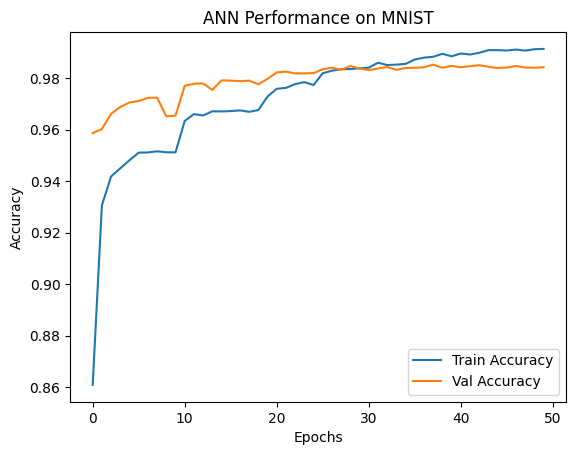

In [27]:
plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ANN Performance on MNIST")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


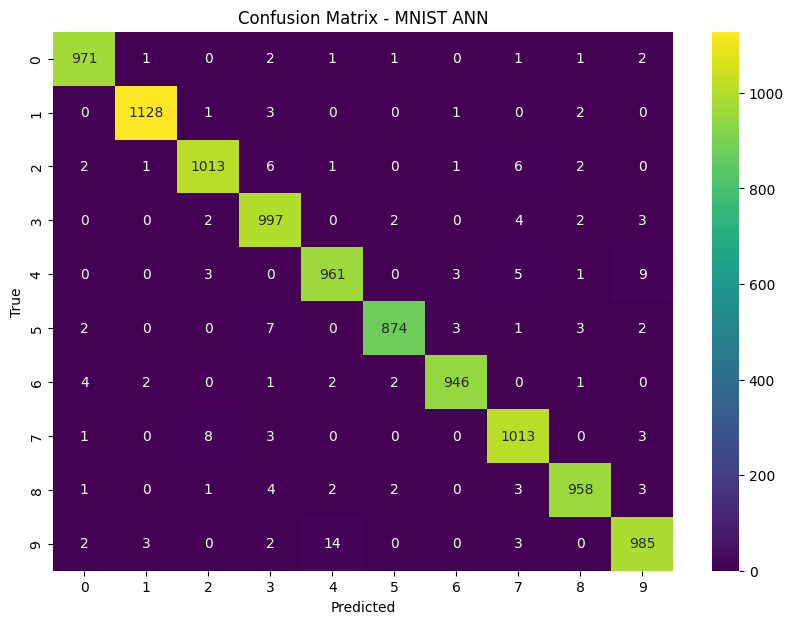

In [28]:
y_pred = model.predict(X_test)
y_pred_classes=np.argmax(y_pred, axis=1)

cm=confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MNIST ANN")
plt.show()

In [29]:
print("\nClassificatipon Report: \n")
print(classification_report(y_test, y_pred_classes))


Classificatipon Report: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



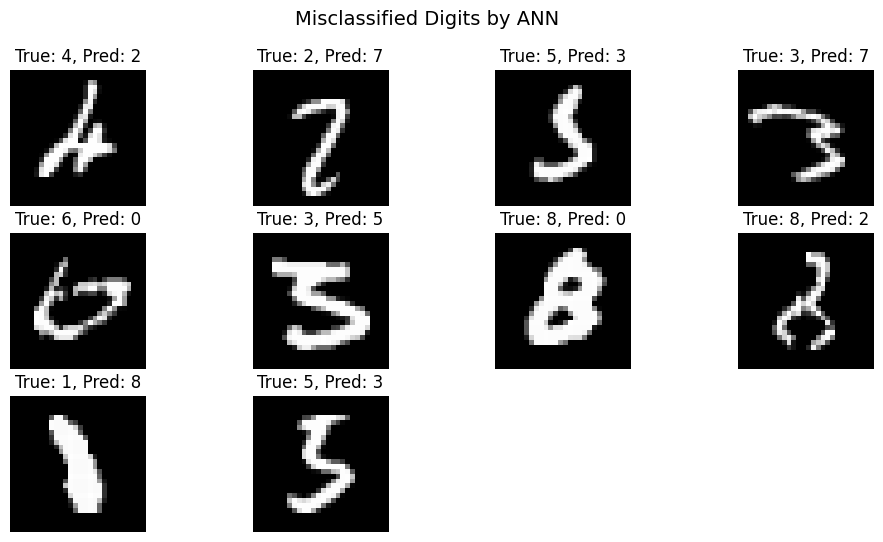

In [30]:
misclassified_idx= np.where(y_pred_classes != y_test)[0]

plt.figure(figsize=(12,6))
for i, idx in enumerate(misclassified_idx[:10]):
  plt.subplot(3,4,i+1)
  plt.imshow(X_test[idx],cmap="gray")
  plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
  plt.axis("off")
plt.suptitle("Misclassified Digits by ANN", fontsize=14)
plt.show()